In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm

In [2]:
ds_p = xr.open_mfdataset("../era5/era5-nordics-precipitation_ymon.nc")

ValueError: zero-size array to reduction operation minimum which has no identity

(array([3.8830e+04, 3.5649e+04, 1.1492e+04, 7.0910e+03, 2.7170e+03,
        9.6600e+02, 2.8100e+02, 1.1700e+02, 6.9000e+01, 2.4000e+01]),
 array([ 433.96606, 1160.4386 , 1886.9113 , 2613.3838 , 3339.8564 ,
        4066.329  , 4792.802  , 5519.274  , 6245.7466 , 6972.219  ,
        7698.692  ], dtype=float32),
 <a list of 10 Patch objects>)

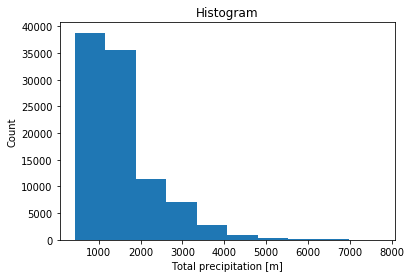

In [120]:
ds_p.tp.plot()

In [121]:
ds_p.tp[:]

<xarray.DataArray 'tp' (time: 12, latitude: 73, longitude: 111)>
dask.array<shape=(12, 73, 111), dtype=float32, chunksize=(12, 73, 111)>
Coordinates:
  * time       (time) datetime64[ns] 2018-01-31T23:00:00 2018-02-28T23:00:00 ...
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 5.5 5.75 6.0 6.25 6.5 ...
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 70.5 70.25 70.0 ...
Attributes:
    long_name:  Total precipitation
    units:      m

In [122]:
psr = xr.open_dataset("pine_spruce.nc")

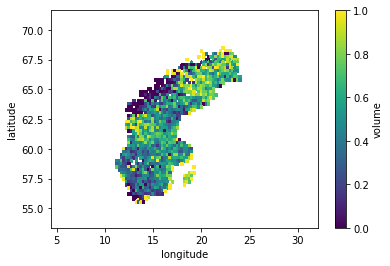

In [123]:
psr.volume.plot()

In [133]:
df = pd.DataFrame()

In [134]:
data = {
    "ratio": psr.volume.values.ravel()
}

In [135]:
data.keys()

dict_keys(['ratio'])

In [136]:
for m in range(0, 12):
    data["p%02d" % (m + 1)] = ds.tp[m].values.ravel()

In [137]:
df = pd.DataFrame(data)

In [138]:
df.dropna(inplace=True)

In [139]:
#df = df[df["ratio"] > 0]

In [140]:
df.columns[1:]

Index(['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09', 'p10',
       'p11', 'p12'],
      dtype='object')

In [219]:
rf = RandomForestRegressor(n_estimators=500, max_depth=16)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df["ratio"])

In [221]:
X_train

,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,p11,p12
3722,3200.058105,837.412720,696.591064,777.549927,956.815247,1083.767334,1673.452881,1819.048218,1250.795044,1224.537476,1153.539185,1142.686035
5046,2861.482422,671.385986,597.252502,728.575012,1157.156860,1524.058838,1609.201538,1688.374268,855.831543,1104.505127,1046.660156,865.325867
3934,2889.741943,633.925476,632.071655,743.042236,1175.701660,1449.700806,1871.754028,1723.296265,1142.239014,1146.812134,978.764282,901.538330
5028,3210.957275,941.654785,783.477478,1057.004761,1528.947510,1659.951782,1927.033569,2061.682617,1218.155518,1420.216431,1410.357300,1054.671753
2613,2841.042969,719.565857,663.452515,788.112366,1076.635986,1611.295898,2087.140137,1777.235718,1292.207642,992.511108,1014.720947,939.135681
7031,3092.636230,888.338440,877.711975,833.317749,1121.296753,1445.250977,1515.746948,1708.942383,980.039795,1192.564819,1048.683838,1040.896973
5370,3175.708740,881.705383,725.335327,830.478088,1405.264526,1692.131714,1932.870972,2167.734619,1188.064697,1375.100708,1232.731567,1133.286255
5487,2890.696777,713.445862,605.929199,743.331970,1150.273071,1395.431030,1636.487061,1589.159180,892.021545,1142.237671,1098.129761,908.234070
5038,3109.746338,828.483948,743.848389,884.826050,1561.569946,1897.682495,1946.211548,2121.752930,1071.561646,1250.645386,1206.563965,1040.811646
1628,2720.007568,648.450012,497.419403,712.687927,1219.039795,1692.556519,2012.013062,1693.043457,1317.215454,964.541931,926.109619,797.316772


In [222]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [223]:
y_pred = rf.predict(X_test)

In [224]:
mean_squared_error(y_test, y_pred)

0.05305103287169635

In [225]:
r2_score(y_test, y_pred)

0.3966401536726948

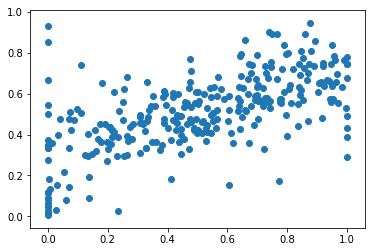

In [226]:
plt.scatter(y_test, y_pred)

In [227]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [228]:
df_results

,observed,predicted
5156,0.358743,0.541091
4935,0.707142,0.569984
4377,0.530806,0.529321
3375,0.346188,0.538078
5483,0.743592,0.530802
3501,0.589503,0.575269
2062,0.837779,0.442855
3486,0.177061,0.364129
1849,0.914082,0.656182
4033,0.645397,0.687791


In [229]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [230]:
feature_importances

,importance
p02,0.149975
p03,0.121748
p12,0.114163
p07,0.092623
p09,0.075847
p05,0.075731
p04,0.073327
p10,0.070890
p01,0.063903
p06,0.062681


<BarContainer object of 12 artists>

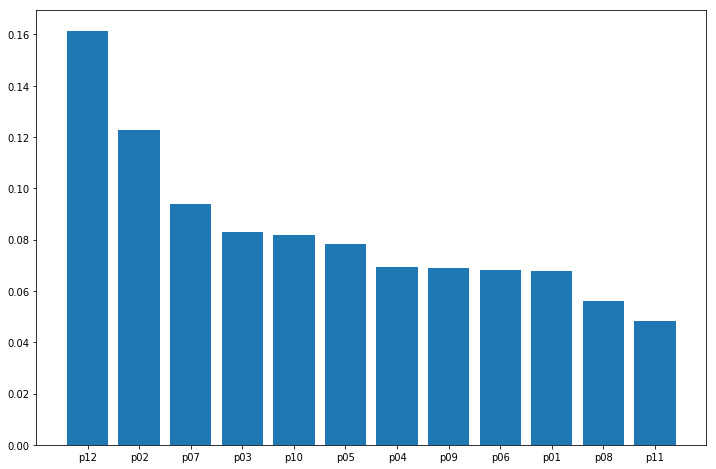

In [218]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])